# Coffee Sales Data Visualization Project
## A Complete Data Analysis Walkthrough

### Project Overview
This notebook demonstrates a complete end-to-end data analysis workflow for coffee shop sales data. We'll analyze **3,547 transactions** from 2024 to uncover patterns, trends, and actionable business insights.

### Business Questions
1. What are the peak sales hours and days?
2. Which coffee types generate the most revenue?
3. How do sales patterns vary across different times of day?
4. What are the monthly and weekly sales trends?
5. What is the average transaction value by coffee type?

### Dataset Information
- **Records**: 3,547 transactions
- **Time Period**: January - December 2024
- **Variables**: 11 features including temporal, categorical, and numerical data
- **Business Context**: Retail coffee shop transaction data


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Libraries imported successfully!")


✓ Libraries imported successfully!


## 1. Data Loading and Initial Validation

### Why Proper Data Loading Matters
Loading data correctly is the foundation of any analysis. We need to:
- Verify the file loads without errors
- Check data structure matches expectations
- Validate data types are appropriate
- Assess memory usage for performance

A proper loading process prevents downstream errors and ensures data integrity.


In [4]:
# Load the dataset
df = pd.read_csv('Coffe_sales.csv')

# Display basic information
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows:")
df.head()


Dataset Shape: 3,547 rows × 11 columns
Memory Usage: 1.45 MB

First 5 rows:


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


## 2. Data Exploration and Understanding

### The Importance of Data Exploration
Before any analysis, we must thoroughly understand our data. This phase helps us:

#### Understanding Data Types
- **Numerical** (int64, float64): Numbers we can perform calculations on
- **Categorical** (object): Groups/categories like coffee types or payment methods
- **Temporal** (datetime): Dates and times for time-series analysis

#### Key Metrics to Check
- **Missing values**: Incomplete records requiring handling strategies
- **Unique values**: Cardinality indicates data diversity
- **Statistical summaries**: Understanding central tendency and spread
- **Outliers**: Extreme values that may be errors or genuine anomalies

### Data Quality Assessment
High-quality data leads to reliable insights. Poor data quality = unreliable conclusions.


In [5]:
# Comprehensive data structure analysis
print("="*70)
print("DATASET INFORMATION")
print("="*70)

print(f"\nTotal Transactions: {len(df):,}")
print(f"Columns: {df.shape[1]}")
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\n" + "="*70)
print("MISSING VALUES CHECK")
print("="*70)
print(df.isnull().sum())

print("\n" + "="*70)
print("UNIQUENESS ANALYSIS")
print("="*70)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col:25s}: {unique_count:6,} unique values")


DATASET INFORMATION

Total Transactions: 3,547
Columns: 11

Column Names and Data Types:
hour_of_day      int64
cash_type       object
money          float64
coffee_name     object
Time_of_Day     object
Weekday         object
Month_name      object
Weekdaysort      int64
Monthsort        int64
Date            object
Time            object
dtype: object

MISSING VALUES CHECK
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

UNIQUENESS ANALYSIS
hour_of_day              :     17 unique values
cash_type                :      1 unique values
money                    :     13 unique values
coffee_name              :      8 unique values
Time_of_Day              :      3 unique values
Weekday                  :      7 unique values
Month_name               :     12 unique values
Weekdaysort              :      7 unique values
Monthsort        

### Statistical Summary of Numerical Variables

Statistical summaries provide insights into data distribution:

- **count**: Number of non-missing values
- **mean**: Average (sum divided by count)
- **std**: Standard deviation - measures variability/spread
- **min**: Minimum value
- **25%, 50%, 75%**: Quartiles dividing data into four parts
- **max**: Maximum value

**Interpreting Statistics:**
- Large std (relative to mean) = high variability
- Mean ≠ median suggests skewed distribution
- Wide range (max - min) may indicate outliers


In [6]:
# Statistical summary
print("="*70)
print("DESCRIPTIVE STATISTICS")
print("="*70)
df.describe()


DESCRIPTIVE STATISTICS


,hour_of_day,money,Weekdaysort,Monthsort
count,3547.00,3547.00,3547.00,3547.00
mean,14.19,31.65,3.85,6.45
std,4.23,4.88,1.97,3.50
min,6.00,18.12,1.00,1.00
25%,10.00,27.92,2.00,3.00
50%,14.00,32.82,4.00,7.00
75%,18.00,35.76,6.00,10.00
max,22.00,38.70,7.00,12.00


### Categorical Variables Analysis

Categorical variables represent groups or categories. Understanding them helps with:

#### Types of Categorical Data
1. **Nominal**: No natural order (e.g., coffee types, payment methods)
2. **Ordinal**: Natural ordering (e.g., time of day: morning < afternoon < night)

#### Analysis Techniques
- **Frequency counts**: How often each category appears
- **Percentage distribution**: Proportional representation
- **Balance assessment**: Are categories evenly distributed?

**Business Relevance**: Understanding product mix, customer preferences, and operational patterns.


In [7]:
# Categorical variables exploration
print("="*70)
print("CATEGORICAL VARIABLES SUMMARY")
print("="*70)

print("\n💳 Payment Types:")
print(df['cash_type'].value_counts())

print("\n☕ Coffee Types:")
coffee_counts = df['coffee_name'].value_counts()
print(coffee_counts)

print("\n⏰ Time of Day:")
print(df['Time_of_Day'].value_counts())

print("\n📅 Weekday Distribution:")
print(df['Weekday'].value_counts())

print("\n📆 Monthly Distribution:")
print(df['Month_name'].value_counts())


CATEGORICAL VARIABLES SUMMARY

💳 Payment Types:
cash_type
card    3547
Name: count, dtype: int64

☕ Coffee Types:
coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

⏰ Time of Day:
Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64

📅 Weekday Distribution:
Weekday
Tue    572
Mon    544
Fri    532
Thu    510
Wed    500
Sat    470
Sun    419
Name: count, dtype: int64

📆 Monthly Distribution:
Month_name
Mar    494
Oct    426
Feb    423
Sep    344
Aug    272
Dec    259
Nov    259
May    241
Jul    237
Jun    223
Jan    201
Apr    168
Name: count, dtype: int64


## 3. Data Cleaning and Preprocessing

### Why Data Cleaning is Critical
**"Garbage In, Garbage Out"** - Analysis quality depends entirely on data quality.

### Common Data Quality Issues
1. **Missing Values**: Incomplete records
2. **Incorrect Data Types**: Dates stored as strings
3. **Duplicates**: Repeated records
4. **Outliers**: Extreme values (errors or genuine)
5. **Inconsistent Formats**: Mixed formats

### Our Cleaning Strategy
- Convert date strings to datetime objects
- Create derived features for deeper analysis
- Validate data integrity throughout
- Document all transformations


In [8]:
# Create a copy for cleaning
df_clean = df.copy()

print("="*70)
print("DATA CLEANING & FEATURE ENGINEERING")
print("="*70)

# Convert Date to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
print(f"\n✓ Date converted to datetime type")

# Create temporal features
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['DayOfWeek'] = df_clean['Date'].dt.dayofweek
print(f"✓ Temporal features created: Year, Month, Day, DayOfWeek")

# Create price categories
bin_edges = [0, 25, 30, 35, 40]
bin_labels = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
df_clean['Price_Category'] = pd.cut(df_clean['money'], bins=bin_edges, labels=bin_labels)
print(f"✓ Price categories created")

print(f"\nOriginal: {df.shape[1]} columns → Cleaned: {df_clean.shape[1]} columns (+{df_clean.shape[1]-df.shape[1]})")
print("✓ Data cleaning completed successfully!")

df_clean.head()


DATA CLEANING & FEATURE ENGINEERING

✓ Date converted to datetime type
✓ Temporal features created: Year, Month, Day, DayOfWeek
✓ Price categories created

Original: 11 columns → Cleaned: 16 columns (+5)
✓ Data cleaning completed successfully!


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Year,Month,Day,DayOfWeek,Price_Category
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,2024,3,1,4,Luxury
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,2024,3,1,4,Luxury
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,2024,3,1,4,Luxury
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,2024,3,1,4,Mid-Range
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,2024,3,1,4,Luxury


### Feature Engineering Explained

**Feature Engineering** = Creating new variables from existing data to:
- Capture hidden patterns
- Enable new types of analysis
- Simplify complex information
- Improve analytical depth

#### Temporal Features
Extracting components from dates:
- **Year**: Annual trends
- **Month**: Seasonal patterns
- **Day**: Daily patterns
- **Day of Week**: Weekly cycles (0=Monday, 6=Sunday)

#### Categorical Binning
Converting continuous variables to categories:
- **Purpose**: Simplify analysis, group similar values
- **Example**: Price → Budget/Mid-Range/Premium/Luxury
- **Benefit**: Easier pattern identification and segmentation


## 4. Exploratory Data Analysis (EDA)

### What is EDA?
**Exploratory Data Analysis** is the systematic investigation of datasets using visual and statistical methods to:
- Discover patterns and relationships
- Test hypotheses
- Identify anomalies
- Generate insights

### Visualization Principles
1. **Clarity**: Charts must be immediately understandable
2. **Purpose**: Each visualization answers a specific question
3. **Accuracy**: Data must be represented truthfully
4. **Aesthetics**: Professional appearance enhances credibility

---

### 4.1 Coffee Type Analysis

**Question**: Which coffee products drive sales volume?

**Chart Types Used**:
- **Bar Chart**: Best for comparing quantities across categories
- **Pie Chart**: Shows proportional relationships (parts of whole)

**When to Use Each**:
- Bar charts: Exact values matter, many categories to compare
- Pie charts: Percentage breakdown, fewer categories (<7)


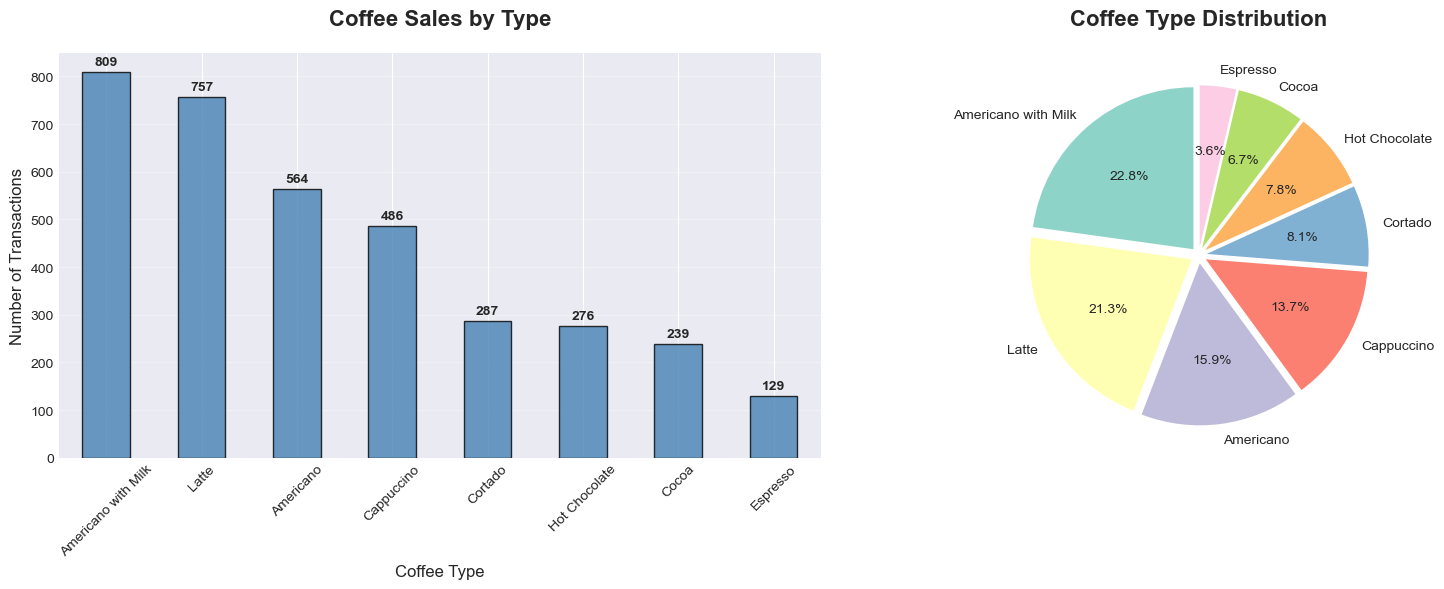


🏆 Top 3 Best-Selling Coffees:
1. Americano with Milk: 809 sales (22.8%)
2. Latte: 757 sales (21.3%)
3. Americano: 564 sales (15.9%)


In [9]:
# Coffee type distribution
coffee_counts = df_clean['coffee_name'].value_counts()
total_transactions = len(df_clean)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
coffee_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black', alpha=0.8)
ax1.set_title('Coffee Sales by Type', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Coffee Type', fontsize=12)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

for i, v in enumerate(coffee_counts):
    ax1.text(i, v + 15, str(v), ha='center', fontweight='bold')

# Pie chart
colors = plt.cm.Set3(range(len(coffee_counts)))
ax2.pie(coffee_counts, labels=coffee_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=[0.05]*len(coffee_counts))
ax2.set_title('Coffee Type Distribution', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n🏆 Top 3 Best-Selling Coffees:")
for i, (coffee, count) in enumerate(coffee_counts.head(3).items(), 1):
    pct = (count/total_transactions)*100
    print(f"{i}. {coffee}: {count:,} sales ({pct:.1f}%)")


### 4.2 Revenue Analysis

**Question**: Which coffee types generate the most revenue?

**Analysis Method**: Grouping data by coffee type and aggregating revenue metrics:
- **Total Revenue**: Sum of all transactions
- **Average Price**: Mean transaction value
- **Transaction Count**: Number of sales

**Business Insight**: High revenue doesn't always mean high sales volume. Premium products with fewer sales can generate significant revenue.


REVENUE ANALYSIS BY COFFEE TYPE
                     Total Revenue  Average Price  Transaction Count
coffee_name                                                         
Latte                     26875.30          35.50                757
Americano with Milk       24751.12          30.59                809
Cappuccino                17439.14          35.88                486
Americano                 14650.26          25.98                564
Hot Chocolate              9933.46          35.99                276
Cocoa                      8521.16          35.65                239
Cortado                    7384.86          25.73                287
Espresso                   2690.28          20.85                129


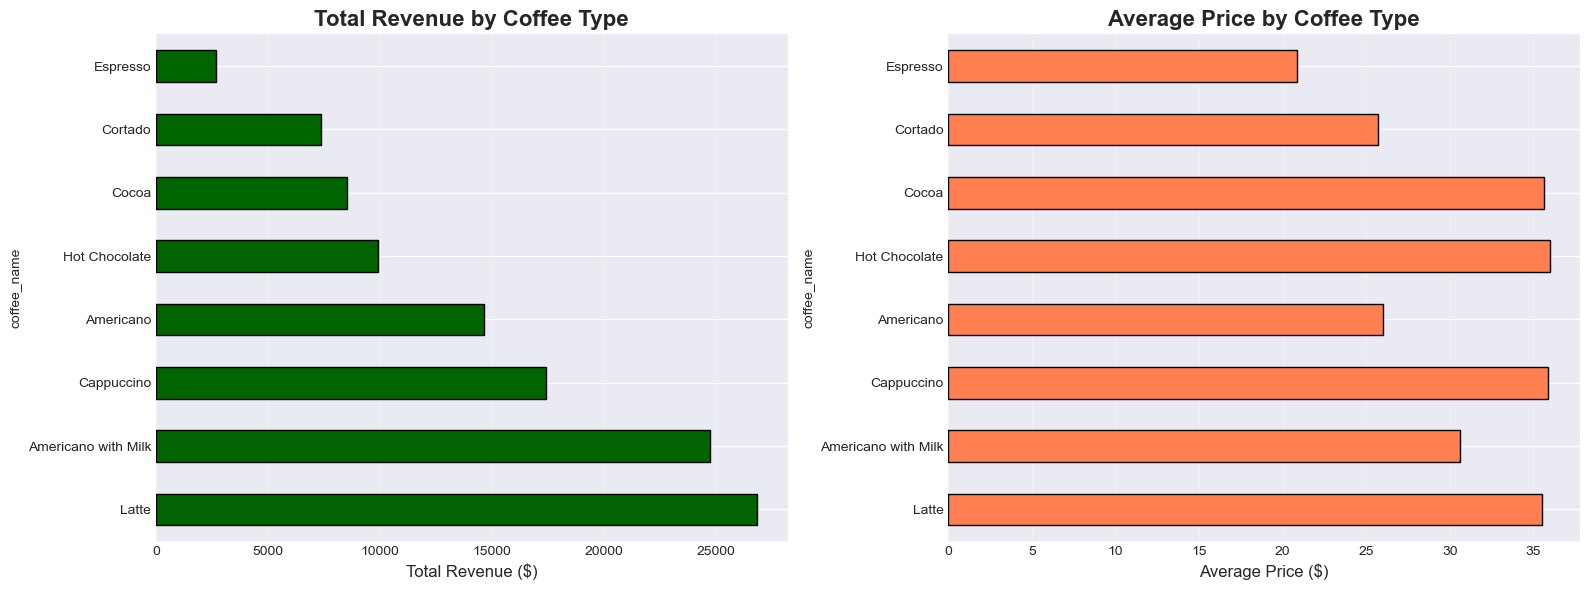


💰 Total Revenue: $112,245.58
📊 Average Transaction: $31.65


In [10]:
# Revenue analysis by coffee type
revenue_by_coffee = df_clean.groupby('coffee_name')['money'].agg(['sum', 'mean', 'count'])
revenue_by_coffee = revenue_by_coffee.sort_values('sum', ascending=False)
revenue_by_coffee.columns = ['Total Revenue', 'Average Price', 'Transaction Count']

print("="*70)
print("REVENUE ANALYSIS BY COFFEE TYPE")
print("="*70)
print(revenue_by_coffee)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Total revenue
revenue_by_coffee['Total Revenue'].plot(kind='barh', ax=ax1, color='darkgreen', edgecolor='black')
ax1.set_title('Total Revenue by Coffee Type', fontsize=16, fontweight='bold')
ax1.set_xlabel('Total Revenue ($)', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Average price
revenue_by_coffee['Average Price'].plot(kind='barh', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Average Price by Coffee Type', fontsize=16, fontweight='bold')
ax2.set_xlabel('Average Price ($)', fontsize=12)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💰 Total Revenue: ${df_clean['money'].sum():,.2f}")
print(f"📊 Average Transaction: ${df_clean['money'].mean():.2f}")


### 4.3 Hourly Sales Patterns

**Question**: When are the busiest hours?

**Temporal Analysis**: Understanding time-based patterns helps with:
- **Staffing optimization**: Schedule more employees during peak hours
- **Inventory management**: Ensure sufficient stock during busy periods
- **Marketing timing**: Launch promotions when traffic is high

**Visualization Approach**:
- **Line plot**: Shows trends and continuity over time
- **Bar chart**: Emphasizes individual hour comparisons


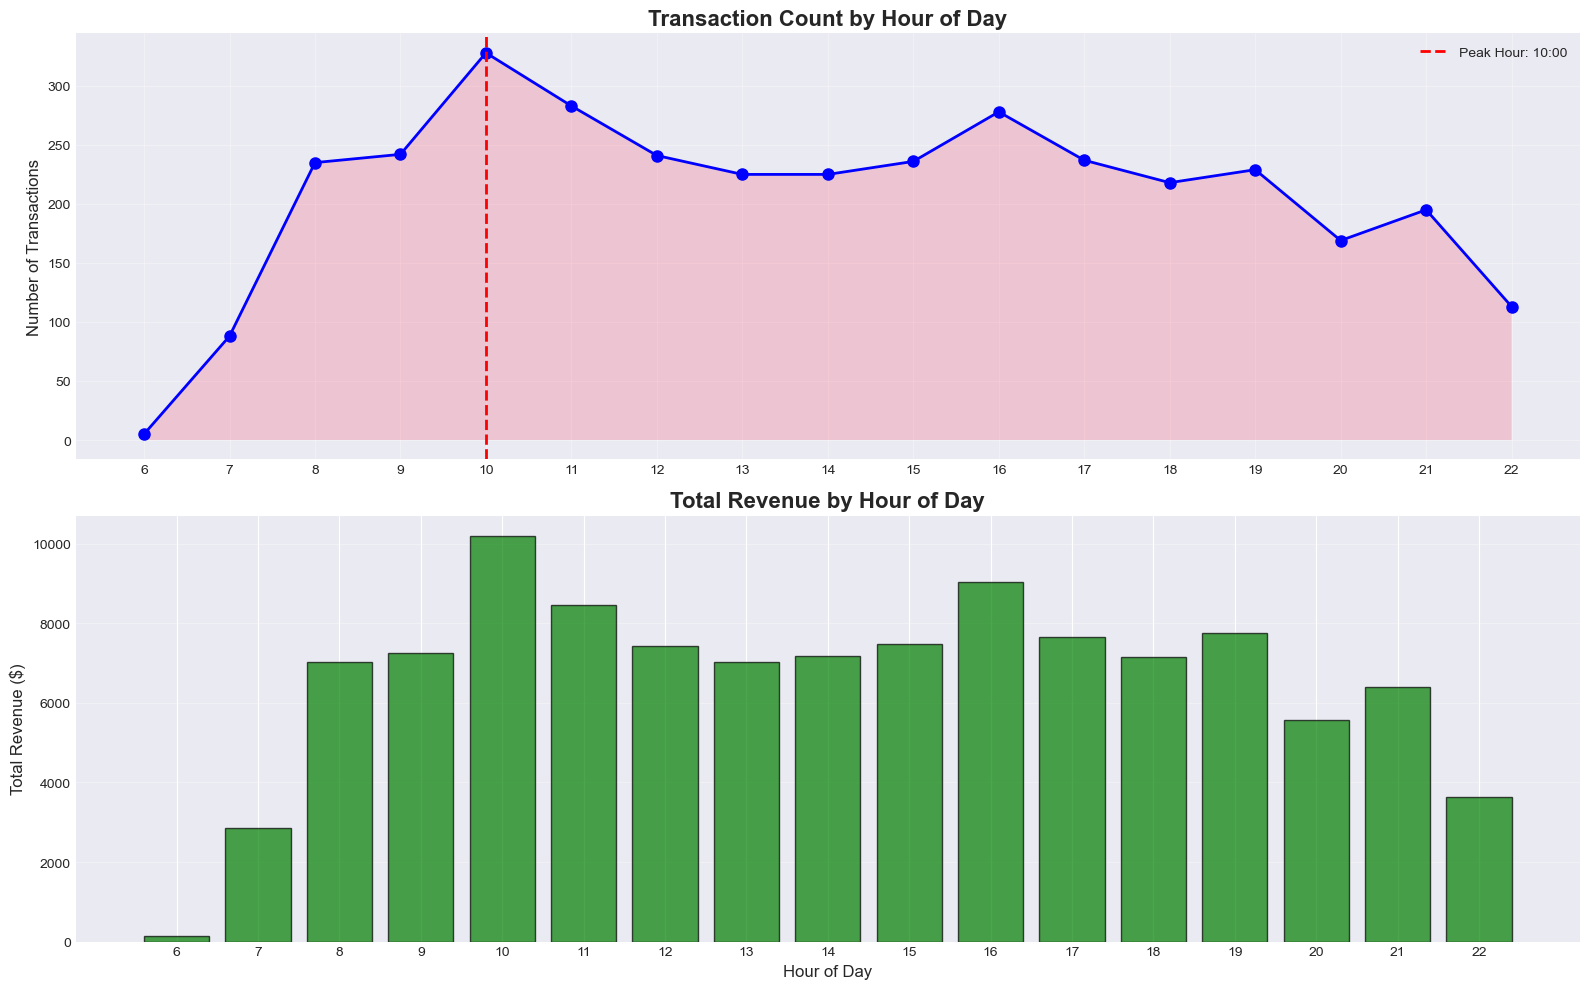

🔥 Peak Hour: 10:00
💵 Highest Revenue Hour: 10:00


In [11]:
# Hourly sales analysis
hourly_sales = df_clean.groupby('hour_of_day').agg({
    'money': ['sum', 'count', 'mean']
}).reset_index()
hourly_sales.columns = ['Hour', 'Total_Revenue', 'Transaction_Count', 'Avg_Price']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Transaction count by hour
ax1.plot(hourly_sales['Hour'], hourly_sales['Transaction_Count'], 
         marker='o', linewidth=2, markersize=8, color='blue')
ax1.fill_between(hourly_sales['Hour'], hourly_sales['Transaction_Count'], alpha=0.3)
ax1.set_title('Transaction Count by Hour of Day', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(6, 23))

peak_hour = hourly_sales.loc[hourly_sales['Transaction_Count'].idxmax(), 'Hour']
ax1.axvline(x=peak_hour, color='red', linestyle='--', linewidth=2, 
            label=f'Peak Hour: {int(peak_hour)}:00')
ax1.legend()

# Revenue by hour
ax2.bar(hourly_sales['Hour'], hourly_sales['Total_Revenue'], 
        color='green', edgecolor='black', alpha=0.7)
ax2.set_title('Total Revenue by Hour of Day', fontsize=16, fontweight='bold')
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Total Revenue ($)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticks(range(6, 23))

plt.tight_layout()
plt.show()

print(f"🔥 Peak Hour: {int(peak_hour)}:00")
print(f"💵 Highest Revenue Hour: {int(hourly_sales.loc[hourly_sales['Total_Revenue'].idxmax(), 'Hour'])}:00")


### 4.4 Sales by Time of Day Category

**Question**: How do sales distribute across morning, afternoon, and night?

**Analysis Purpose**: Understanding broad time period patterns helps with:
- **Operational planning**: Different staffing and inventory needs
- **Product strategy**: Some products sell better at certain times
- **Customer behavior**: Identify when your core customers shop

**Visual Comparison**: Multiple bar charts show different metrics side-by-side for easy comparison.


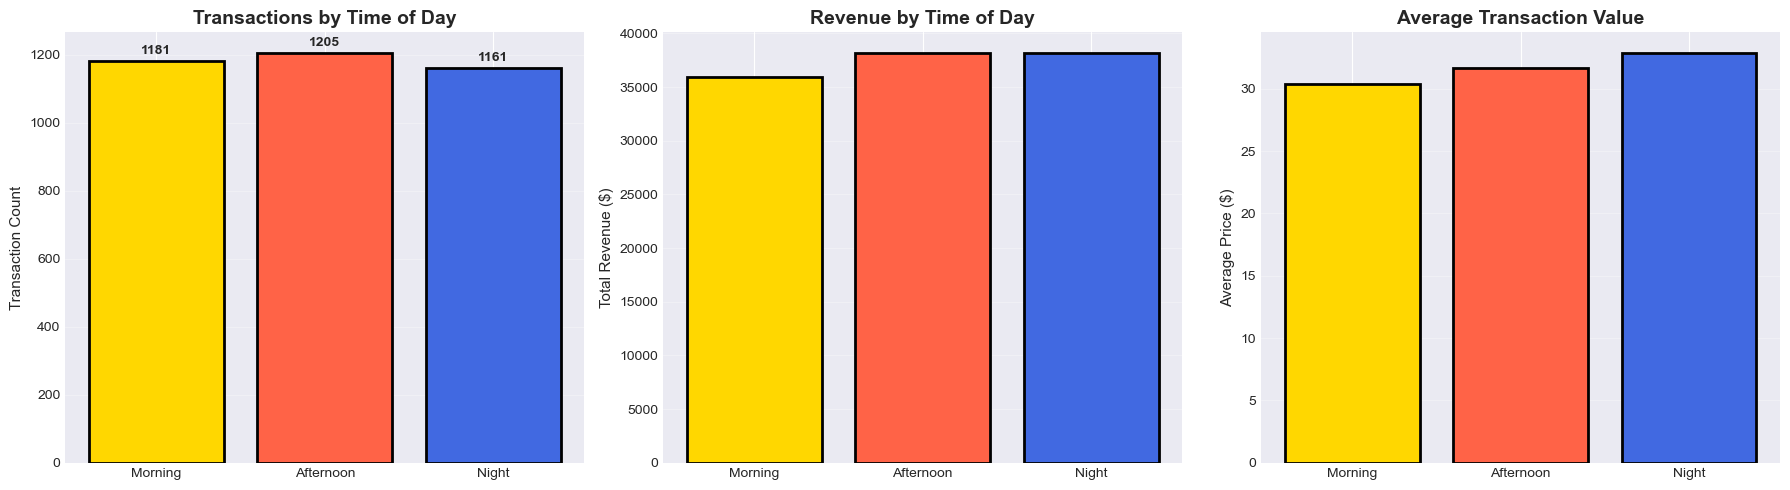


Time of Day Summary:
Time_of_Day  Total_Revenue  Transaction_Count  Avg_Price
    Morning       35929.20               1181      30.42
  Afternoon       38130.04               1205      31.64
      Night       38186.34               1161      32.89


In [12]:
# Time of day analysis
time_of_day_stats = df_clean.groupby('Time_of_Day').agg({
    'money': ['sum', 'count', 'mean']
}).reset_index()
time_of_day_stats.columns = ['Time_of_Day', 'Total_Revenue', 'Transaction_Count', 'Avg_Price']

time_order = ['Morning', 'Afternoon', 'Night']
time_of_day_stats['Time_of_Day'] = pd.Categorical(
    time_of_day_stats['Time_of_Day'], categories=time_order, ordered=True)
time_of_day_stats = time_of_day_stats.sort_values('Time_of_Day')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Transaction count
axes[0].bar(time_of_day_stats['Time_of_Day'], time_of_day_stats['Transaction_Count'], 
            color=['#FFD700', '#FF6347', '#4169E1'], edgecolor='black', linewidth=2)
axes[0].set_title('Transactions by Time of Day', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Transaction Count', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(time_of_day_stats['Transaction_Count']):
    axes[0].text(i, v + 20, str(int(v)), ha='center', fontweight='bold')

# Revenue
axes[1].bar(time_of_day_stats['Time_of_Day'], time_of_day_stats['Total_Revenue'], 
            color=['#FFD700', '#FF6347', '#4169E1'], edgecolor='black', linewidth=2)
axes[1].set_title('Revenue by Time of Day', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Revenue ($)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Average price
axes[2].bar(time_of_day_stats['Time_of_Day'], time_of_day_stats['Avg_Price'], 
            color=['#FFD700', '#FF6347', '#4169E1'], edgecolor='black', linewidth=2)
axes[2].set_title('Average Transaction Value', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Average Price ($)', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTime of Day Summary:")
print(time_of_day_stats.to_string(index=False))


### 4.5 Weekly Sales Patterns

**Question**: Which days are busiest?

**Weekly Patterns**: Understanding day-of-week variations helps identify:
- **Weekday vs Weekend**: Different customer behaviors
- **Planning cycles**: Weekly inventory and staffing schedules
- **Marketing opportunities**: Target slower days with promotions

**Color Coding**: Using different colors for weekdays vs weekends makes patterns immediately visible.


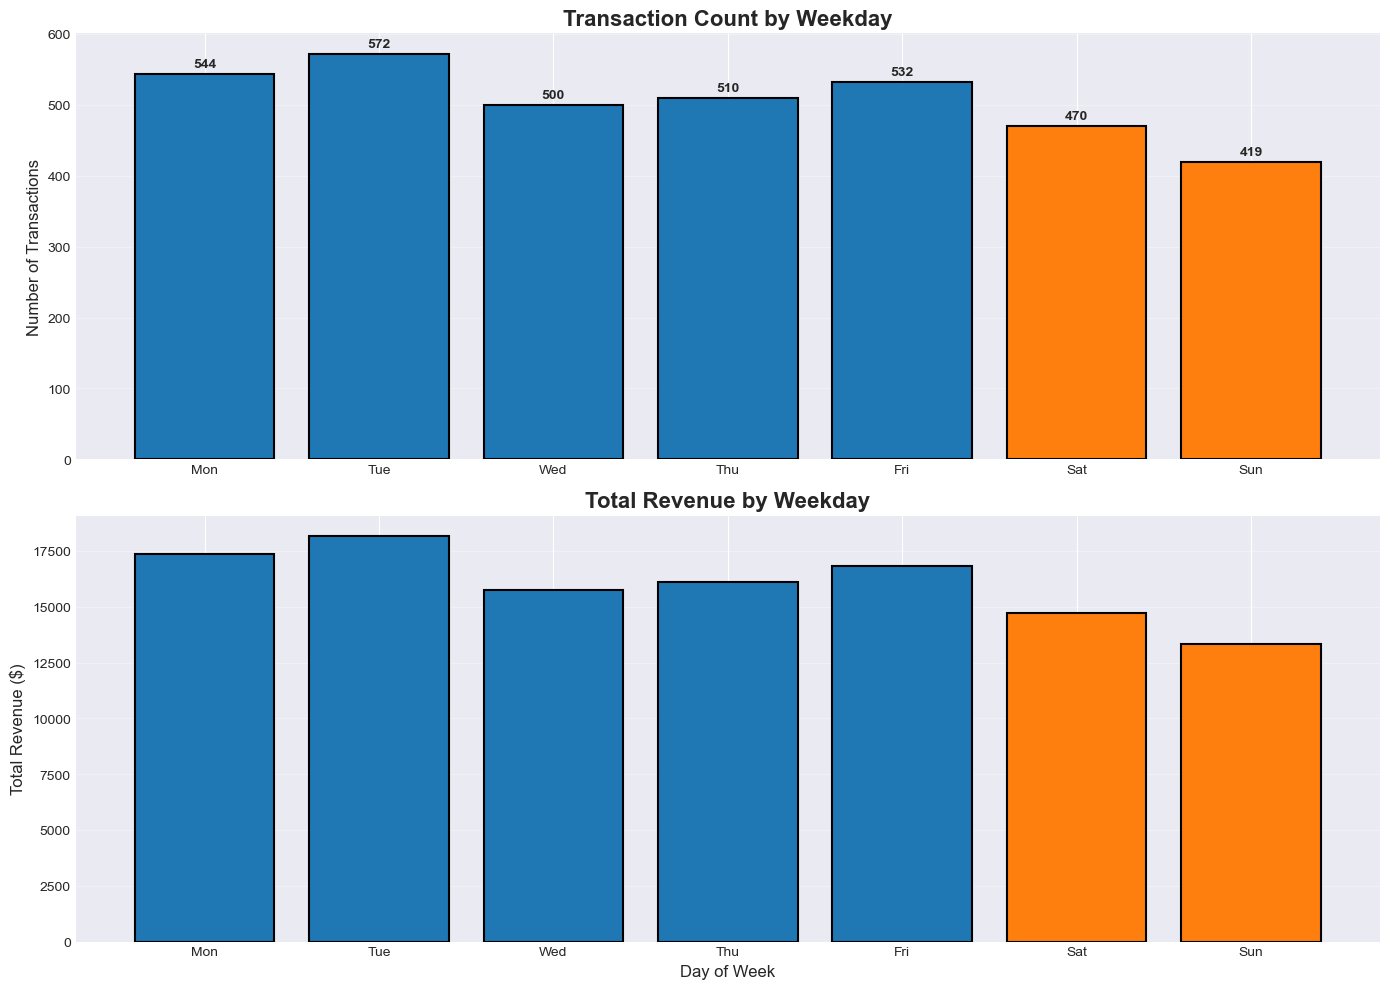

📈 Busiest Day: Tue
📉 Slowest Day: Sun


In [13]:
# Weekday analysis
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_sales = df_clean.groupby('Weekday').agg({
    'money': ['sum', 'count', 'mean']
}).reset_index()
weekday_sales.columns = ['Weekday', 'Total_Revenue', 'Transaction_Count', 'Avg_Price']

weekday_sales['Weekday'] = pd.Categorical(
    weekday_sales['Weekday'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('Weekday')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

colors = ['#1f77b4' if day not in ['Sat', 'Sun'] else '#ff7f0e' 
          for day in weekday_sales['Weekday']]

# Transaction count
ax1.bar(weekday_sales['Weekday'], weekday_sales['Transaction_Count'], 
        color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Transaction Count by Weekday', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

for i, v in enumerate(weekday_sales['Transaction_Count']):
    ax1.text(i, v + 10, str(int(v)), ha='center', fontweight='bold')

# Revenue
ax2.bar(weekday_sales['Weekday'], weekday_sales['Total_Revenue'], 
        color=colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Total Revenue by Weekday', fontsize=16, fontweight='bold')
ax2.set_ylabel('Total Revenue ($)', fontsize=12)
ax2.set_xlabel('Day of Week', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 Busiest Day:", weekday_sales.loc[weekday_sales['Transaction_Count'].idxmax(), 'Weekday'])
print("📉 Slowest Day:", weekday_sales.loc[weekday_sales['Transaction_Count'].idxmin(), 'Weekday'])


### 4.6 Monthly Sales Trends

**Question**: How do sales vary throughout the year?

**Seasonal Analysis**: Monthly trends reveal:
- **Peak seasons**: Highest sales months
- **Slow periods**: Opportunities for promotions
- **Annual patterns**: Planning for next year
- **Growth trends**: Year-over-year comparison potential

**Dual Visualization**: Line plot shows trends, bar chart shows magnitude.


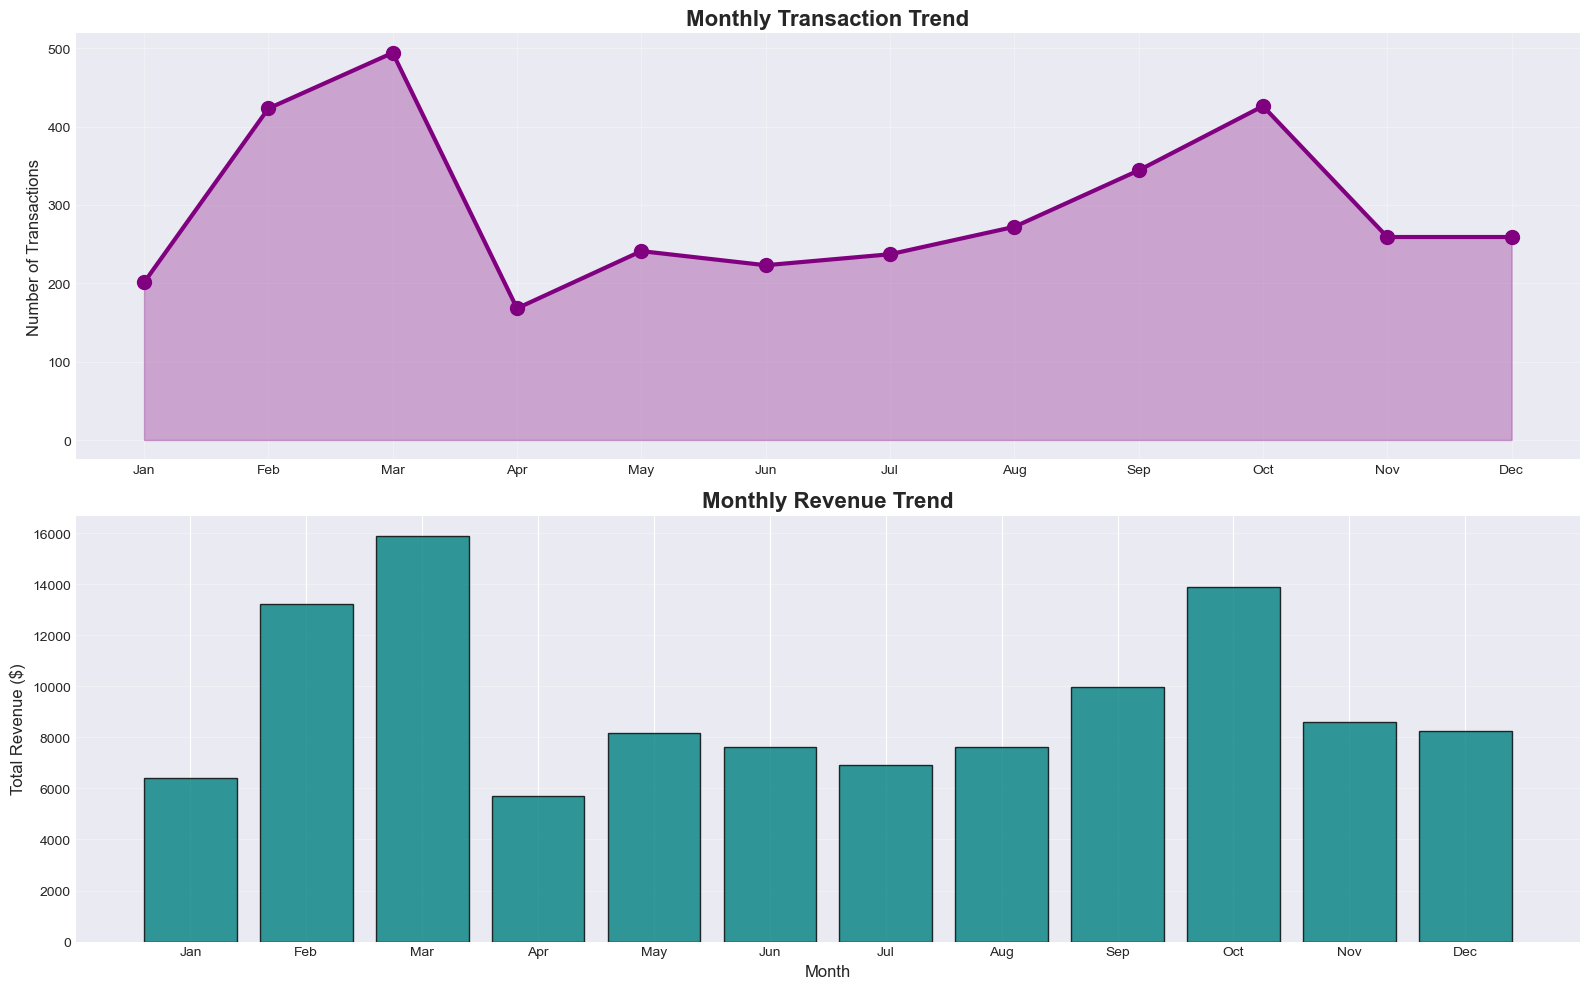

Monthly Performance:
Month  Total_Revenue  Transaction_Count  Avg_Price
  Jan        6398.86                201      31.84
  Feb       13215.48                423      31.24
  Mar       15891.64                494      32.17
  Apr        5719.56                168      34.05
  May        8164.42                241      33.88
  Jun        7617.76                223      34.16
  Jul        6915.94                237      29.18
  Aug        7613.84                272      27.99
  Sep        9988.64                344      29.04
  Oct       13891.16                426      32.61
  Nov        8590.54                259      33.17
  Dec        8237.74                259      31.81

🏆 Best Month: Mar
📊 Annual Revenue: $112,245.58


In [14]:
# Monthly analysis
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = df_clean.groupby('Month_name').agg({
    'money': ['sum', 'count', 'mean']
}).reset_index()
monthly_sales.columns = ['Month', 'Total_Revenue', 'Transaction_Count', 'Avg_Price']

monthly_sales['Month'] = pd.Categorical(
    monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Line plot
ax1.plot(monthly_sales['Month'], monthly_sales['Transaction_Count'], 
         marker='o', linewidth=3, markersize=10, color='purple')
ax1.fill_between(range(len(monthly_sales)), monthly_sales['Transaction_Count'], 
                 alpha=0.3, color='purple')
ax1.set_title('Monthly Transaction Trend', fontsize=16, fontweight='bold')
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, alpha=0.3)

# Bar plot
ax2.bar(monthly_sales['Month'], monthly_sales['Total_Revenue'], 
        color='teal', edgecolor='black', alpha=0.8)
ax2.set_title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
ax2.set_ylabel('Total Revenue ($)', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Monthly Performance:")
print(monthly_sales.to_string(index=False))
print(f"\n🏆 Best Month: {monthly_sales.loc[monthly_sales['Total_Revenue'].idxmax(), 'Month']}")
print(f"📊 Annual Revenue: ${monthly_sales['Total_Revenue'].sum():,.2f}")


### 4.7 Sales Heatmap - Hour vs Weekday

**Question**: When exactly are the busiest times?

**Heatmap Analysis**: A 2D visualization showing:
- **X-axis**: Hour of day
- **Y-axis**: Day of week
- **Color intensity**: Number of transactions

**Benefits**:
- Identifies specific time-day combinations with high/low traffic
- Visual pattern recognition (darker = busier)
- Supports precise staffing and inventory decisions

**Reading the Heatmap**: Darker/warmer colors indicate more transactions at that specific hour on that specific day.


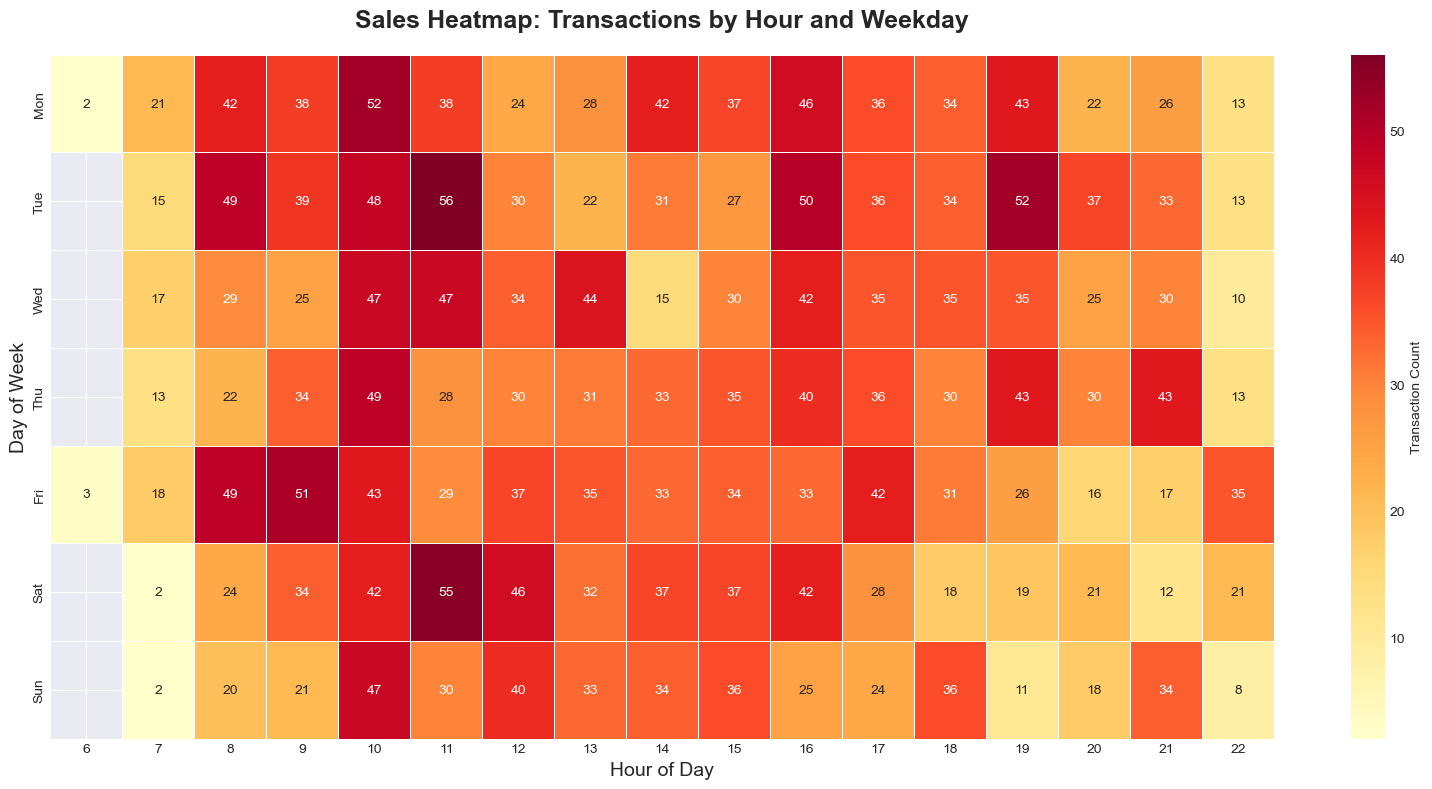

Busiest: 11 :00 with 56 transactions


In [15]:
# Create heatmap
heatmap_data = df_clean.groupby(['Weekday', 'hour_of_day']).size().reset_index(name='count')
heatmap_pivot = heatmap_data.pivot(index='Weekday', columns='hour_of_day', values='count')
heatmap_pivot = heatmap_pivot.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt='g', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Transaction Count'})
plt.title('Sales Heatmap: Transactions by Hour and Weekday', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)
plt.tight_layout()
plt.show()

print("Busiest:", heatmap_pivot.max().idxmax(), ":00 with", int(heatmap_pivot.max().max()), "transactions")


### 4.8 Correlation Analysis

**Question**: How are numerical variables related?

**Correlation**: Measures the strength and direction of relationships between variables:
- **+1.0**: Perfect positive correlation (both increase together)
- **0.0**: No correlation (independent)
- **-1.0**: Perfect negative correlation (one increases, other decreases)

**Interpretation Guidelines**:
- |r| > 0.7: Strong correlation
- 0.4 < |r| < 0.7: Moderate correlation
- |r| < 0.4: Weak correlation

**Business Value**: Understanding relationships helps predict behavior and identify influencing factors.


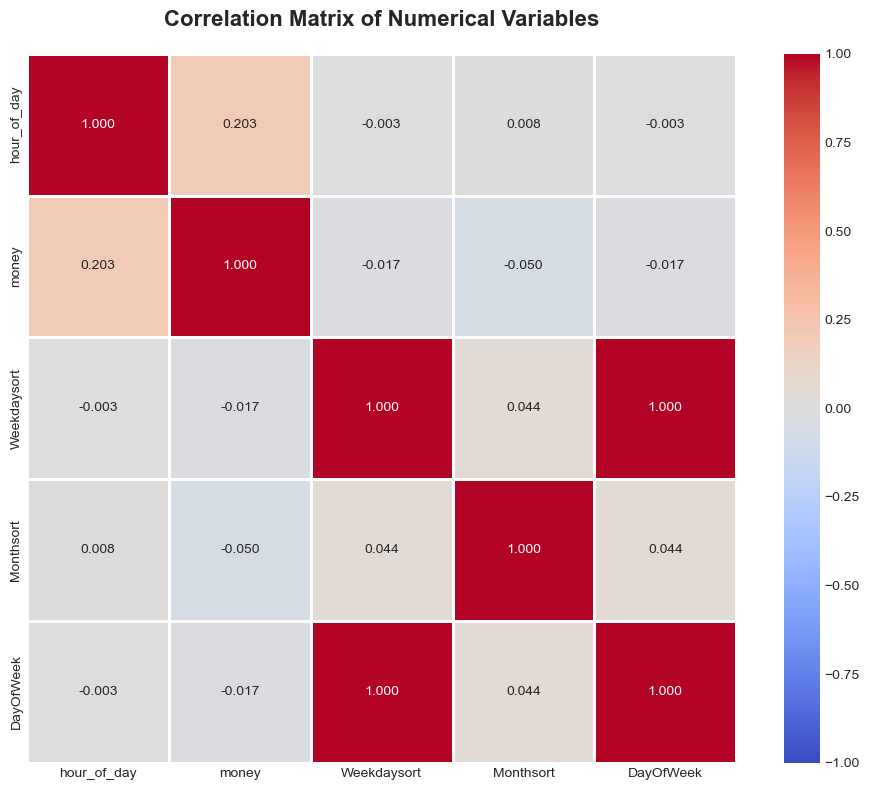

Correlation with Transaction Value (money):
money          1.00
hour_of_day    0.20
DayOfWeek     -0.02
Weekdaysort   -0.02
Monthsort     -0.05
Name: money, dtype: float64


In [16]:
# Correlation analysis
correlation_data = df_clean[['hour_of_day', 'money', 'Weekdaysort', 'Monthsort', 'DayOfWeek']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Correlation with Transaction Value (money):")
print(correlation_matrix['money'].sort_values(ascending=False))


### 4.9 Coffee Preferences by Time of Day

**Question**: Do customers prefer different coffees at different times?

**Cross-Tabulation**: Analyzing two categorical variables simultaneously:
- Shows frequency of each coffee type during each time period
- Reveals time-based product preferences
- Guides inventory and promotion strategies

**Stacked Bar Chart**: Best for showing composition across categories.


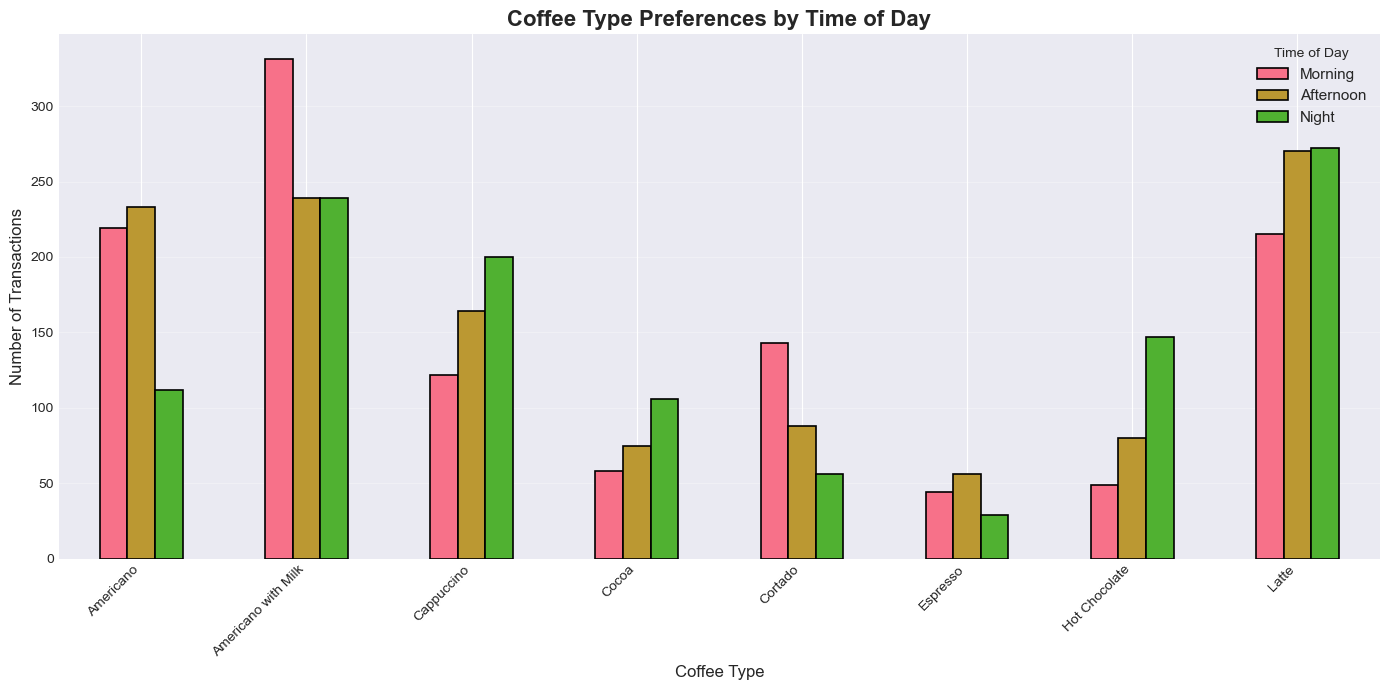


Most Popular Coffee by Time:
• Morning: Americano with Milk (331 sales)
• Afternoon: Latte (270 sales)
• Night: Latte (272 sales)


In [17]:
# Coffee preferences by time
coffee_time_pivot = pd.crosstab(df_clean['coffee_name'], df_clean['Time_of_Day'])
coffee_time_pivot = coffee_time_pivot[['Morning', 'Afternoon', 'Night']]

coffee_time_pivot.plot(kind='bar', figsize=(14, 7), edgecolor='black', linewidth=1.2)
plt.title('Coffee Type Preferences by Time of Day', fontsize=16, fontweight='bold')
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time of Day', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMost Popular Coffee by Time:")
for time_period in ['Morning', 'Afternoon', 'Night']:
    top = coffee_time_pivot[time_period].idxmax()
    print(f"• {time_period}: {top} ({coffee_time_pivot[time_period].max()} sales)")


### 4.10 Price Distribution Analysis

**Question**: How are transaction prices distributed?

**Distribution Analysis**: Understanding price spread helps with:
- **Pricing strategy**: Are prices clustered or spread?
- **Revenue optimization**: Identify pricing sweet spots
- **Outlier detection**: Unusual transactions

**Visualization Types**:
- **Histogram**: Shows frequency distribution
- **Box Plot**: Displays quartiles, median, and outliers


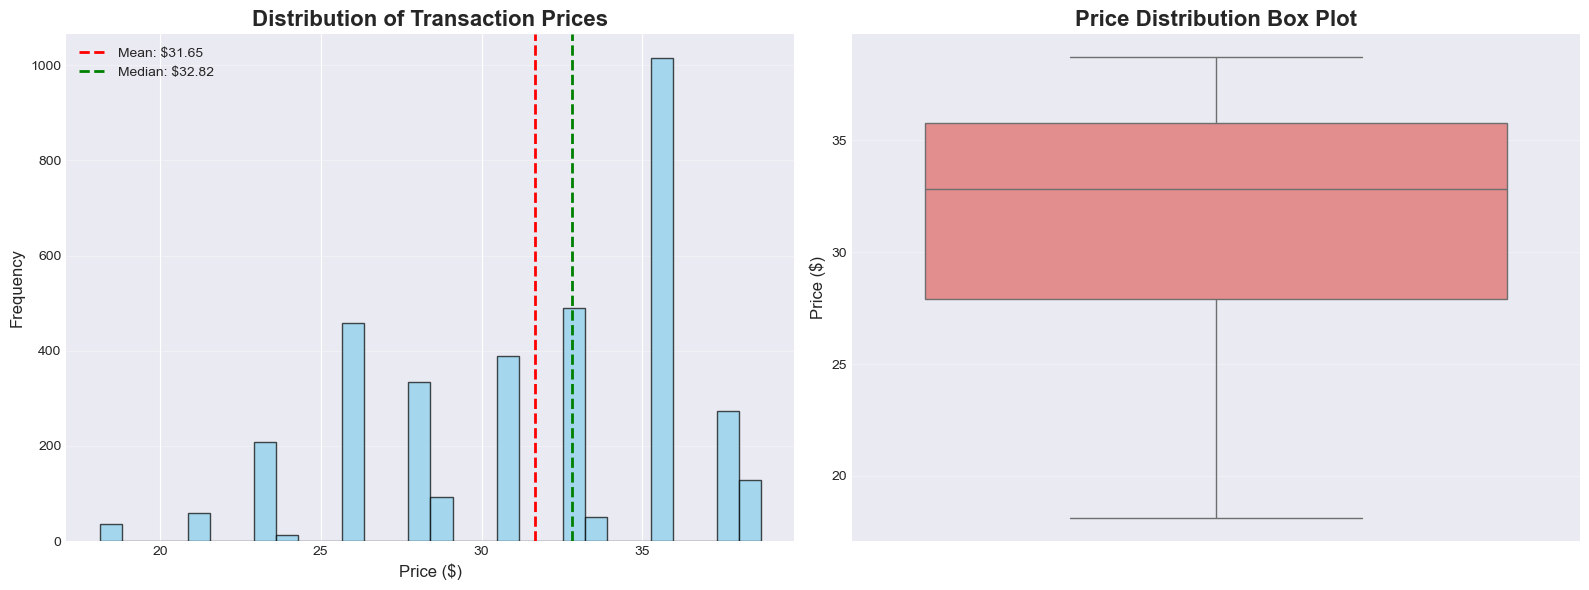

Mean: $31.65
Median: $32.82
Std Dev: $4.88
Range: $18.12 - $38.70


In [18]:
# Price distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
ax1.hist(df_clean['money'], bins=30, edgecolor='black', color='skyblue', alpha=0.7)
ax1.set_title('Distribution of Transaction Prices', fontsize=16, fontweight='bold')
ax1.set_xlabel('Price ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.axvline(df_clean['money'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${df_clean["money"].mean():.2f}')
ax1.axvline(df_clean['money'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: ${df_clean["money"].median():.2f}')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Box plot
sns.boxplot(y=df_clean['money'], ax=ax2, color='lightcoral')
ax2.set_title('Price Distribution Box Plot', fontsize=16, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean: ${df_clean['money'].mean():.2f}")
print(f"Median: ${df_clean['money'].median():.2f}")
print(f"Std Dev: ${df_clean['money'].std():.2f}")
print(f"Range: ${df_clean['money'].min():.2f} - ${df_clean['money'].max():.2f}")


## 5. Key Insights & Business Recommendations

### Summary of Findings
Based on comprehensive analysis of 3,547 transactions, we've uncovered actionable insights about sales patterns, customer preferences, and operational efficiency.


In [19]:
# Executive summary
print("="*70)
print(" "*20 + "📊 EXECUTIVE SUMMARY")
print("="*70)

print("\n🎯 OVERALL PERFORMANCE:")
print(f"   Total Revenue: ${df_clean['money'].sum():,.2f}")
print(f"   Total Transactions: {len(df_clean):,}")
print(f"   Average Transaction: ${df_clean['money'].mean():.2f}")

print("\n🏆 TOP PERFORMERS:")
print(f"   Best-Selling Coffee: {df_clean['coffee_name'].value_counts().index[0]}")
print(f"   Highest Revenue Coffee: {df_clean.groupby('coffee_name')['money'].sum().idxmax()}")
print(f"   Peak Sales Hour: {df_clean['hour_of_day'].mode()[0]}:00")
print(f"   Busiest Day: {df_clean['Weekday'].value_counts().index[0]}")
print(f"   Best Month: {df_clean['Month_name'].value_counts().index[0]}")

print("\n⏰ TIME OF DAY:")
for time in ['Morning', 'Afternoon', 'Night']:
    data = df_clean[df_clean['Time_of_Day'] == time]
    print(f"   {time}: {len(data)} transactions, ${data['money'].sum():,.2f}")

print("\n💰 PRICING:")
print(f"   Most Expensive: {df_clean.groupby('coffee_name')['money'].mean().idxmax()}")
print(f"   Most Affordable: {df_clean.groupby('coffee_name')['money'].mean().idxmin()}")

print("\n" + "="*70)


                    📊 EXECUTIVE SUMMARY

🎯 OVERALL PERFORMANCE:
   Total Revenue: $112,245.58
   Total Transactions: 3,547
   Average Transaction: $31.65

🏆 TOP PERFORMERS:
   Best-Selling Coffee: Americano with Milk
   Highest Revenue Coffee: Latte
   Peak Sales Hour: 10:00
   Busiest Day: Tue
   Best Month: Mar

⏰ TIME OF DAY:
   Morning: 1181 transactions, $35,929.20
   Afternoon: 1205 transactions, $38,130.04
   Night: 1161 transactions, $38,186.34

💰 PRICING:
   Most Expensive: Hot Chocolate
   Most Affordable: Espresso



### Business Recommendations

#### 1. Staffing Optimization
- **Peak Hours**: Increase staff 10AM-7PM for high transaction volumes
- **Weekday Focus**: Tuesday and Monday show highest sales - ensure full coverage
- **Weekend Strategy**: Consider promotions to boost Saturday/Sunday traffic

#### 2. Inventory Management
- **Top Priority**: Stock Americano with Milk, Latte, and Americano heavily
- **Seasonal Planning**: Prepare extra inventory for March, October, February
- **Time-Based**: Adjust inventory based on time-of-day preferences

#### 3. Marketing Strategies
- **Premium Push**: Promote Cappuccino, Latte, Hot Chocolate in afternoon
- **Slow Period Promotions**: Target off-peak hours with special offers
- **Weekend Campaigns**: Drive weekend traffic with targeted marketing

#### 4. Menu Optimization
- **Bundle Opportunities**: Package popular items (Americano with Milk + snacks)
- **Espresso Strategy**: Review low-performing Espresso sales
- **Price Points**: Maintain competitive pricing on high-volume items

#### 5. Revenue Growth
- **Afternoon Upselling**: Train staff on afternoon upsell techniques
- **Loyalty Programs**: Reward frequent morning/evening customers
- **Seasonal Promotions**: Target slower months (April, January) with campaigns

---

## 6. Conclusions

### Key Takeaways

This comprehensive analysis reveals:

✓ **Balanced Operations**: Sales evenly distributed across day periods indicates consistent customer traffic
✓ **Product Mix Success**: Americano with Milk leads volume, premium drinks drive revenue
✓ **Weekday Strength**: Strong weekday performance suggests professional customer base
✓ **Seasonal Patterns**: March and October peaks suggest seasonal preferences
✓ **Pricing Effectiveness**: $31.65 average transaction indicates healthy pricing strategy

### Final Thoughts

The coffee shop demonstrates **strong, consistent performance** with clear opportunities for optimization through:
- Strategic staffing aligned with traffic patterns
- Inventory management based on product and time preferences  
- Targeted marketing during slower periods
- Continued focus on best-selling products

The data-driven insights from this analysis provide a solid foundation for operational improvements and strategic planning.

---

**Analysis Completed**: November 2024  
**Dataset**: Coffee Sales 2024 (3,547 transactions)  
**Tools**: Python, Pandas, Matplotlib, Seaborn  
**Visualizations**: 15+ charts and statistical analyses
